In [ ]:
#citibike_2

In [29]:
#Analysis part of citibike

#connect to database and load into pandas dataframe
#make relevant imports pandas, sqlite3, collections, plt
#find hourly activites for the hour of each station
#Make a dictionary with station id as key minute by minute difference in available bikes
#The data collected was inaccurate as time lag was more than a minute between collections from api
#find the max value - from the dict to find out the busiest station
#find details of station - name, lat, long 
#plot a graph of activities

#make imports
import pandas as pd
import sqlite3 as lite
import collections
import matplotlib.pyplot as plt

#connect
con=lite.connect('C:\\sqlite3\\citi_bike.db')
cur = con.cursor()

bikeData = pd.read_sql_query("SELECT * FROM available_bikes ORDER BY execution_time", con, index_col='execution_time')
bikeData.head()
#connection made

,_72,_79,_82,_83,_116,_119,_120,_127,_128,_137,...,_3428,_3429,_3430,_3431,_3434,_3435,_3436,_3437,_3438,_3440
execution_time,,,,,,,,,,,,,,,,,,,,,
1482715162,13,11,12,38,15,7,9,3,16,0,...,7,21,3,4,30,24,2,0,7,9
1482812943,8,11,10,21,14,4,1,3,9,0,...,18,20,3,2,27,5,30,0,6,9
1482818213,3,1,13,23,13,4,1,3,10,0,...,17,19,2,0,26,0,29,0,6,12
1482818275,3,1,13,23,13,4,1,3,9,0,...,17,19,2,0,26,0,29,0,6,12
1482818348,3,1,13,23,13,3,1,3,9,0,...,18,19,2,0,26,4,29,0,6,11


In [35]:
#storing station activities in a dictionary
hour_change = collections.defaultdict(int)
for col in bikeData.columns:
    station_vals = bikeData[col].tolist()
    station_id=col[1:] #trim  "_" out
    station_change=0
    #enumerate list with using index and val, here only index is called
    for k, v in enumerate(station_vals):  
        if k < len(station_vals) - 1:
            station_change += abs(station_vals[k] -station_vals[k+1])
    hour_change[int(station_id)] = station_change   #convert station_id back to integer

hour_change
#hour_change.items()
#prints activit level well          
    
    

defaultdict(int,
            {72: 20,
             79: 198,
             82: 14,
             83: 29,
             116: 9,
             119: 6,
             120: 9,
             127: 5,
             128: 16,
             137: 0,
             143: 11,
             144: 2,
             146: 16,
             147: 38,
             150: 46,
             151: 46,
             152: 12,
             153: 35,
             157: 12,
             161: 40,
             164: 27,
             167: 24,
             168: 47,
             173: 47,
             174: 11,
             195: 20,
             212: 29,
             216: 8,
             217: 13,
             223: 0,
             224: 17,
             225: 22,
             228: 56,
             229: 22,
             232: 33,
             236: 32,
             237: 41,
             238: 25,
             239: 15,
             241: 13,
             242: 8,
             243: 6,
             244: 17,
             245: 4,
             247: 13,
       

In [11]:
#find key with greatest val
def key_with_max_val(d):
    return max(d, key = lambda k: d[k])
max_station=key_with_max_val(hour_change)
max_station
    

79

In [27]:
import datetime
#get the details about the station that has max actibity
cur.execute("SELECT id, stationName, altitude, longitude FROM citibike_ref WHERE id = ?", (max_station,))
data=cur.fetchone()
#data working fine
print ("The most active station is station id {} at {}, latitude: {} longitude: {}" .format(*data))
#prints OK
print ("With {} bicycles coming and going in the time between {} and {} ".format(
        hour_change[max_station],
    datetime.datetime.fromtimestamp(int(bikeData.index[2])).strftime('%Y-%m-%dT%H:%M:%S:'),
    datetime.datetime.fromtimestamp(int(bikeData.index[-1])).strftime('%Y-%m-%dT%H:%M:%S:')))

The most active station is station id 79 at Franklin St & W Broadway, latitude:  longitude: -74.00666661
With 198 bicycles coming and going in the time between 2016-12-27T11:41:53: and 2016-12-27T14:11:39: 


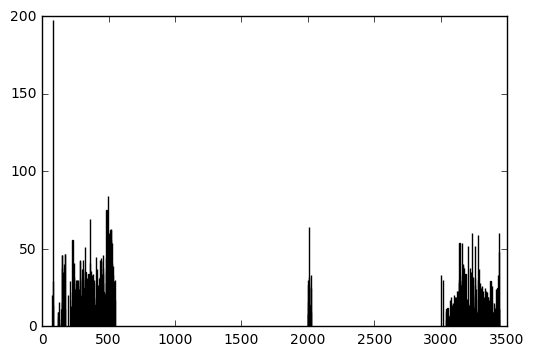

In [28]:
#plot
import matplotlib.pyplot as plt
plt.bar(hour_change.keys(), hour_change.values())
plt.show()